# Spam Detection

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
#Loading the dataset
df=pd.read_csv('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
#Random 10 Samples
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2217,ham,* Will have two more cartons off u and is very...,NaN,NaN,NaN
5143,ham,Hi darlin im on helens fone im gonna b up the ...,NaN,NaN,NaN
3600,ham,"Jay told me already, will do",NaN,NaN,NaN
2259,ham,Ill call you evening ill some ideas.,NaN,NaN,NaN
4512,spam,Money i have won wining number 946 wot do i do...,NaN,NaN,NaN
3590,ham,How much would it cost to hire a hitman,NaN,NaN,NaN
2541,ham,I dont. Can you send it to me. Plus how's mode.,NaN,NaN,NaN
3004,ham,Ew are you one of them?,NaN,NaN,NaN
2089,ham,No i'm not. I can't give you everything you wa...,NaN,NaN,NaN
4081,ham,No no. I will check all rooms befor activities,NaN,NaN,NaN


In [44]:
#Dropping the unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [45]:
#Let's rename the columns
df.rename(columns={'v1':'Label','v2':'Messages'},inplace=True)

In [46]:
df.head()

,Label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#Checking the shape of data
df.shape

(5572, 2)

There are 5572 rows and 2 columns

In [14]:
#Checking the count of Label
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

The count of Ham is 4825 and Spam is 747

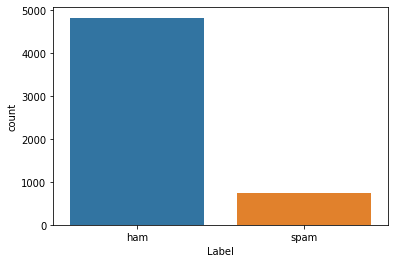

In [17]:
sns.countplot(df['Label'])
plt.show()

Ham count is high as compare to spam.

# Spam Ratio

In [20]:
print("Spam Ratio=",round(len(df[df['Label']=='spam'])/len(df.Label),2)*100,'%')

Spam Ratio= 13.0 %


# Ham Ratio

In [21]:
print("Ham Ratio=",round(len(df[df['Label']=='ham'])/len(df.Label),2)*100,'%')

Ham Ratio= 87.0 %


Ham Ratio is greater than Spam Ratio.

In [47]:
#Checking the length of message
df['Length']=df.Messages.str.len()

In [48]:
df.head(7)

,Label,Messages,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77


In [49]:
#Let's replace ham with 0 and spam with 1
df['Label'].replace({'ham':0,'spam':1},inplace=True)

In [50]:
df.head()

,Label,Messages,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Regular Expression

In [51]:
#Replace Email
df['Messages']=df['Messages'].str.replace(r'^.+@[^\.].*[a-z]{2,}$','emailaddress')

In [53]:
#Replace URL with web address
df['Messages']=df['Messages'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [55]:
#Replace money symbols with dollers
df['Messages']=df['Messages'].str.replace(r'\$','dollers')

In [57]:
#Replace number with phone number
df['Messages']=df['Messages'].str.replace(r'^\(?[\d]{3}\)?[\S-]?[\d]{3}[\S-]?[\d]{4}$','phonenumber')

In [59]:
#Replace with number
df['Messages']=df['Messages'].str.replace(r'\d+(\.\d+)?','number')

In [61]:
#Removing Punctuation
df['Messages']=df['Messages'].str.replace(r'[^\w\d\s]',' ')

In [63]:
#Remove widespace
df['Messages']=df['Messages'].str.replace(r'\s+',' ')

In [65]:
#Removing Leading and Trailing Whitespace
df['Messages']=df['Messages'].str.replace(r'^\s+1\s+?$',' ')

# Removing Stop words

In [37]:
import string
import nltk
from nltk.corpus import stopwords

In [75]:
stop_words=set(stopwords.words('english')+
              ['u','U','_','b','c','n','Nah','fr','ur','4','2','im','dont','doin','ure'])

In [76]:
df['Messages']=df['Messages'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [77]:
df['Clean_Length']=df.Messages.str.len()

In [78]:
df

,Label,Messages,Length,Clean_Length
0,0,Go jurong point crazy Available bugis great wo...,111,80
1,0,Ok lar Joking wif oni,29,21
2,1,Free entry number wkly comp win FA Cup final t...,155,147
3,0,dun say early hor already say,49,29
4,0,I think goes usf lives around though,61,36
...,...,...,...,...
5567,1,This numbernd time tried number contact number...,160,139
5568,0,Will going esplanade home,37,25
5569,0,Pity mood So suggestions,57,24
5570,0,The guy bitching I acted like interested buyin...,125,85


In [79]:
print('Original Length:',df.Length.sum())
print("Clean Length:",df.Clean_Length.sum())

Original Length: 446085
Clean Length: 323334


In [80]:
print("Removal of text:",(df.Length.sum()-df.Clean_Length.sum())/df.Length.sum()*100)

Removal of text: 27.517401392111367


27% of irrelevant data has been removed from the Messages.

### Message Distribution before cleaning

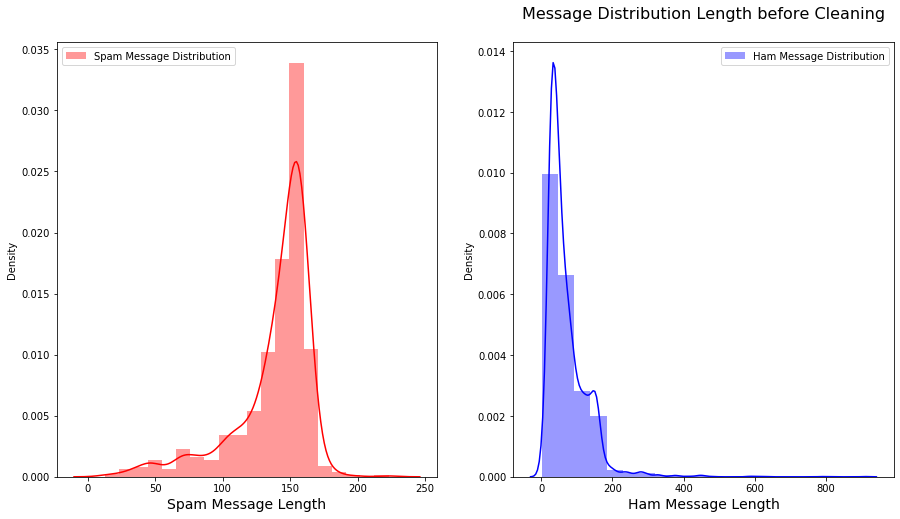

In [93]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['Label']==1]['Length'],bins=20,ax=ax[0],label='Spam Message Distribution',color='r')

ax[0].set_xlabel('Spam Message Length',fontsize=14)
ax[0].legend()


sns.distplot(df[df['Label']==0]['Length'],bins=20,ax=ax[1],label='Ham Message Distribution',color='b')

ax[1].set_xlabel('Ham Message Length',fontsize=14)
ax[1].legend()

plt.title('Message Distribution Length before Cleaning\n',fontsize=16)
plt.show()

# Message Distribution after Cleaning

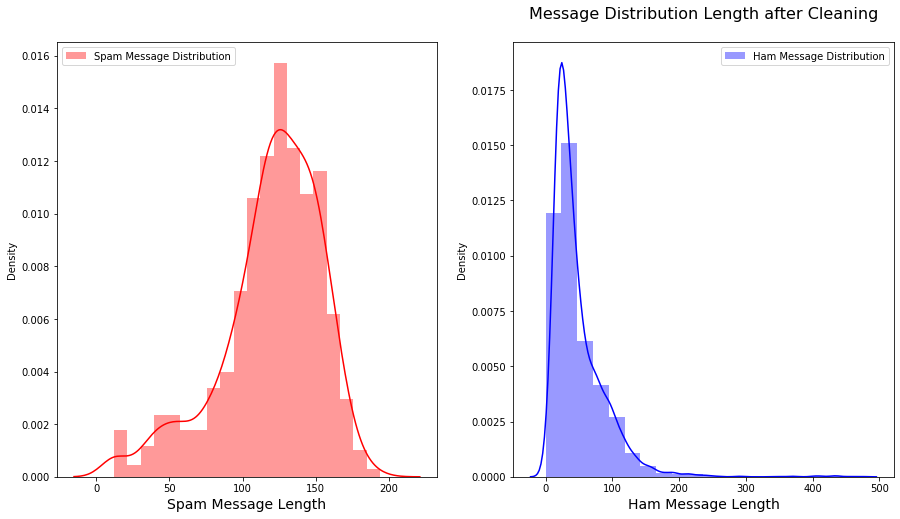

In [94]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['Label']==1]['Clean_Length'],bins=20,ax=ax[0],label='Spam Message Distribution',color='r')

ax[0].set_xlabel('Spam Message Length',fontsize=14)
ax[0].legend()


sns.distplot(df[df['Label']==0]['Clean_Length'],bins=20,ax=ax[1],label='Ham Message Distribution',color='b')

ax[1].set_xlabel('Ham Message Length',fontsize=14)
ax[1].legend()

plt.title('Message Distribution Length after Cleaning\n',fontsize=16)
plt.show()

In [95]:
#Getting sense of loud words in spam
from wordcloud import WordCloud

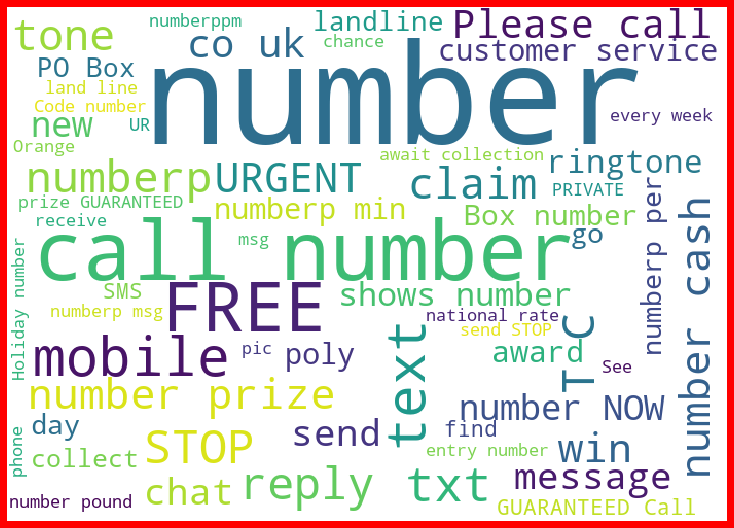

In [98]:
#Loud words in Spam
spam=df['Messages'][df['Label']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=60).generate(' '.join(spam))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

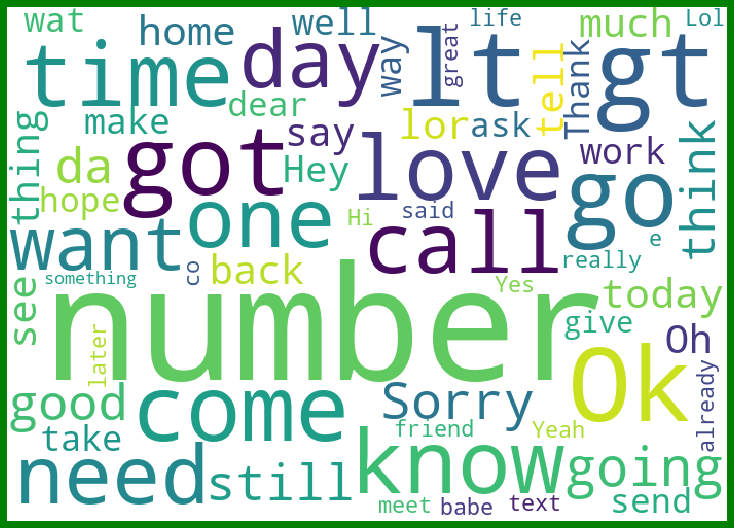

In [99]:
#Loud words in Ham
ham=df['Messages'][df['Label']==0]
ham_cloud=WordCloud(width=700,height=500,background_color='white',max_words=60).generate(' '.join(ham))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Tfidf Vectorizer

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [102]:
tfidf=TfidfVectorizer()
mnb=MultinomialNB()
features=tfidf.fit_transform(df['Messages'])

In [103]:
#Splitting into x and y for training and testing
x=features
y=df['Label']

In [104]:
#Training and Testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [105]:
x_train.shape

(4179, 7880)

In [106]:
x_test.shape

(1393, 7880)

In [107]:
y_train.shape

(4179,)

In [108]:
y_test.shape

(1393,)

In [109]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [111]:
pred=mnb.predict(x_test)
print("Predicted values:",pred,'\n')
print("Classification Report:\n",classification_report(y_test,pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))

Predicted values: [0 0 0 ... 0 0 0] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1202
           1       1.00      0.74      0.85       191

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.96      0.96      1393
 

Confusion Matrix:
 [[1202    0]
 [  49  142]]


In [112]:
conf_matrix=confusion_matrix(y_test,pred)

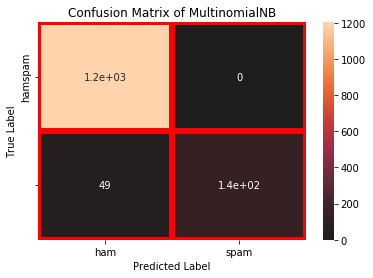

In [113]:
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,linewidth=5,linecolor='r',center=0)
ax.set_xlabel('Predicted Label');ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix of MultinomialNB')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham''spam'])
plt.show()

In [114]:
#Here is the predicted and actual value of Spam and Ham
df=pd.DataFrame([mnb.predict(x_test)[:],y_test[:]],index=['Predicted','Actual'])
df

,0,1,2,3,4,5,6,7,8,9,...,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392
Predicted,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Actual,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [115]:
df.T

,Predicted,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,1,1
...,...,...
1388,0,0
1389,0,0
1390,0,0
1391,0,0


In [116]:
df.to_csv('Spam_detection_predicted_values.csv')